In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [14]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_test.shape # (50000, 32, 32, 3)
#Y_train[0]

(10000, 32, 32, 3)

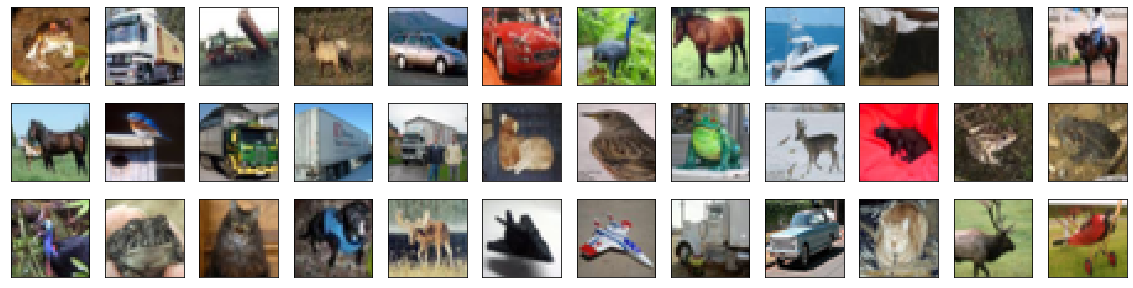

In [15]:
flg = plt.figure(figsize=(20,5))
for i in range(36):
#     ax = flg.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax = flg.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [19]:
#X_train.shape
X_train[0,0,0]

array([0.23137255, 0.24313725, 0.24705882])

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
# Y_train.shape
Y_train[0]

array([6], dtype=uint8)

In [23]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [24]:
# Model(input, output)
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [25]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)


In [27]:
model.fit(X_train, Y_train, batch_size=150, epochs=5, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 33s 815us/step - loss: 1.2628 - accuracy: 0.5435 - val_loss: 1.2080 - val_accuracy: 0.5632
Epoch 2/5
40000/40000 [==============================] - 42s 1ms/step - loss: 1.1008 - accuracy: 0.6089 - val_loss: 1.1191 - val_accuracy: 0.5975
Epoch 3/5
40000/40000 [==============================] - 49s 1ms/step - loss: 0.9808 - accuracy: 0.6549 - val_loss: 0.9716 - val_accuracy: 0.6612
Epoch 4/5
40000/40000 [==============================] - 51s 1ms/step - loss: 0.8747 - accuracy: 0.6905 - val_loss: 0.9903 - val_accuracy: 0.6557
Epoch 5/5
40000/40000 [==============================] - 52s 1ms/step - loss: 0.7984 - accuracy: 0.7204 - val_loss: 0.9323 - val_accuracy: 0.6749


In [28]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 2s 241us/step


[0.933776807975769, 0.6736000180244446]

In [29]:
pred = model.predict(X_test)

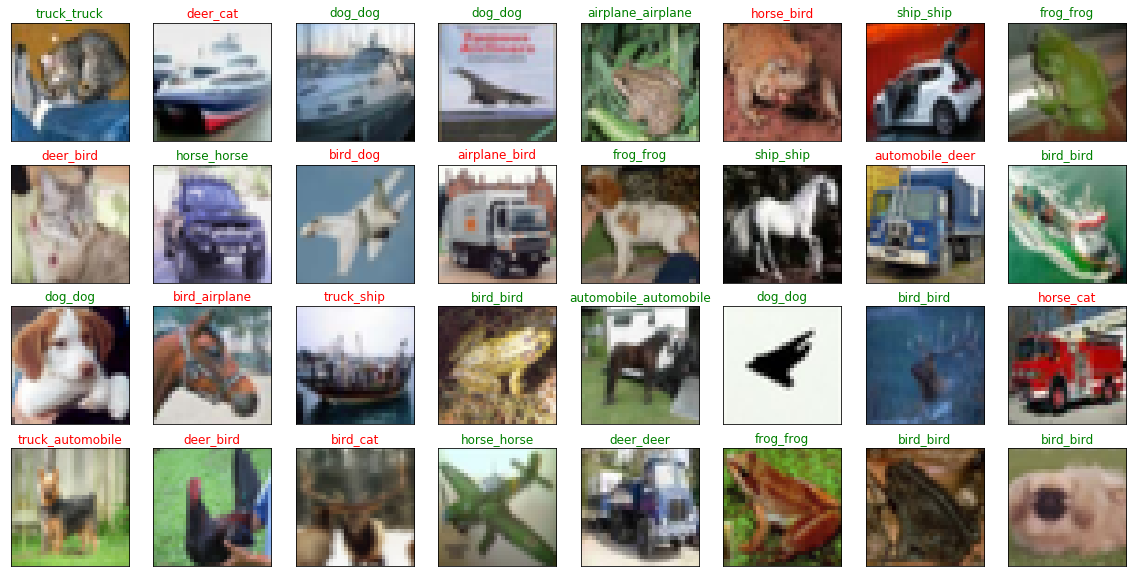

In [30]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

flg = plt.figure(figsize=(20, 10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = flg.add_subplot(4, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[i])
    
    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])
    
    ax.set_title("{}_{}".format(labels[pred_idx], labels[true_idx]), color='green' if pred_idx == true_idx else 'red')